# autograd
torch's autograd is the auto gradident computing engine for user convinience. the core data structure of the autograd is Variable.

In [3]:
import torch as t
a = t.randn(3,4, requires_grad=True)

ModuleNotFoundError: No module named 'torch'

  the core of the autograd in pytroch is the computing graph, the computing graph is a special kind of DAG. the computing graph is dynamic, That means it constructs the computing graph at begining of every forward propogation. so it can use python control sentence(such as for,if etc) to meet the requirements of the computing graph. It means you don't need to construct the path of the graph in advance, it will construct the computing graph at runtime.
  **Extension to the autograd** , most of the function can use autograd to calculate derivative automatically,but you can inherit Function class to write a complicated function if needed. you can refer to [autograd](https://github.com/chenyuntc/pytorch-book/blob/master/chapter03-tensor_and_autograd/Autograd.ipynb) for detailed information.
  

**example : Use Variable to implement linear regression**  
We will use autograd/Variable to implement linear regression and experience the convinient of autograd

torch.Size([8, 1]) torch.Size([8, 1])


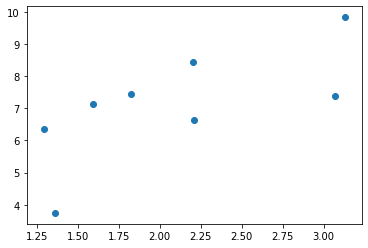

In [8]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
# setting random seed in order to get same output on different computers
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    '''
    generate data y=x*2+3, add some noise 
    torch.rand returns a tensor，including a group of random numbers even sampled form [0,1)
    包含了从区间[0, 1)的均匀分布中抽取的一组随机数。张量的形状由参数sizes定义。
    torch.randn return a tensor, including a group of random numbers guassian normal sampled from [0,1)
    (mean:0,variance:1)
    返回一个张量，包含了从标准正态分布（均值为0，方差为1，即高斯白噪声）中抽取的一组随机数。张量的形状由参数sizes定义。
    '''
    x = t.rand(batch_size,1) * 5
    y = x*2 + 3+ t.randn(batch_size,1)
    return x,y
x, y = get_fake_data()
print(x.shape,y.shape)
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

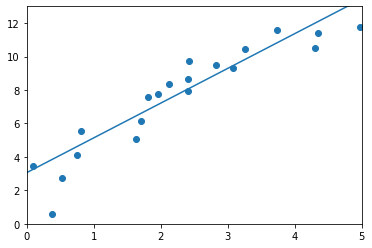

2.1436233520507812 2.8287124633789062


(5, 50)

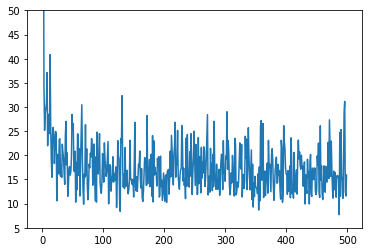

In [9]:
# random initialize parameters
# import torch as t
# %matplotlib inline
# from matplotlib import pyplot as plt
# from IPython import display
# import numpy as np
# # setting random seed in order to get same output on different computers
# t.manual_seed(1000)

# def get_fake_data(batch_size=8):
#     '''
#     generate data y=x*2+3, add some noise 
#     torch.rand returns a tensor，including a group of random numbers even sampled form [0,1)
#     包含了从区间[0, 1)的均匀分布中抽取的一组随机数。张量的形状由参数sizes定义。
#     torch.randn return a tensor, including a group of random numbers guassian normal sampled from [0,1)
#     (mean:0,variance:1)
#     返回一个张量，包含了从标准正态分布（均值为0，方差为1，即高斯白噪声）中抽取的一组随机数。张量的形状由参数sizes定义。
#     '''
#     x = t.rand(batch_size,1) * 5
#     y = x*2 + 3+ t.randn(batch_size,1)
#     return x,y
w = t.rand(1,1, requires_grad=True)
b = t.zeros(1,1, requires_grad=True)
losses = np.zeros(500)
lr = 0.005
for ii in range(500):
    x,y = get_fake_data(batch_size=32)
    '''
    torch.mul(a,b) is the correspondence element multiplication of matrix a and b
    torch.mm(a,b) is the multiplication of matrix a and b 
    '''
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5* (y_pred-y)**2
    loss = loss.sum()
    losses[ii] = loss.item()
    
    # calculate the gradient
    loss.backward()
    
    # update parameters
    w.data.sub_(lr*w.grad.data)
    b.data.sub_(lr*b.grad.data)
    
    # clear the gradient
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii % 50 == 0:
        display.clear_output(wait=True)
        x = t.arange(0,6).view(-1,1).float()
        y = x.mm(w.data) + b.data.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predict
        
        x2,y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(), y2.numpy()) #true data
        
        plt.xlim(0,5)
        plt.ylim(0,13)
        plt.show()
        plt.pause(0.5)
        
print(w.item(), b.item())
plt.plot(losses)
plt.ylim(5,50)